## Biomassestatistikk etter produksjonsområde

Data hentet fra [Fiskeridirektoratet](https://www.fiskeridir.no/Akvakultur/Tall-og-analyse/Biomassestatistikk/Biomassestatistikk-etter-produksjonsomraade)

### Importing data

In [108]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from helpers.dicts import traffic_light
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
with open("input/biomasse.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data["Data"])

### Clean data

* Standardization: Round "BIOMASSE_KG" to integer
* Merge: "TRAFFIC_LIGHTS" based on helpers/dicts.py
* Sum "UTSETTSÅR"
* Remove 2024

In [92]:
df["BIOMASSE_KG"] = df['BIOMASSE_KG'].round().astype(int)
df["TRAFFIC_LIGHT"] = df['PO_KODE'].map(lambda x: traffic_light.get(x, {}).get("light"))
df["DATO"] = pd.to_datetime(df['ÅR'].astype(str) + "-" + df["MÅNED_KODE"].astype(str))
clean_df = df.groupby(["DATO", "PO_KODE", "PO_NAVN", "ARTSID", "TRAFFIC_LIGHT"]).agg({"BEHFISK_STK": "sum", "BIOMASSE_KG": "sum"}).reset_index()
clean_df = clean_df[(clean_df["DATO"].dt.year != 2024) & (clean_df["DATO"].dt.year != 2017)]

### Plot data

In [124]:
def monthly_laks(df, color):
    laks_df = df[(df["TRAFFIC_LIGHT"] == color) & (df['ARTSID'] == "LAKS")]
    laks_df["DATO"] = pd.to_datetime(laks_df["DATO"])
    return laks_df

def monthly_regnbue(df, color):
    color_df = df[df["TRAFFIC_LIGHT"] == color]
    orret_df = color_df[color_df['ARTSID'] == "REGNBUEØRRET"]
    orret_df["DATO"] = pd.to_datetime(orret_df["DATO"])
    return orret_df

## GRØNNE OMRÅDER

/var/folders/_x/sb88pn2x5n155w8cdkqc519m0000gp/T/ipykernel_72154/2122027419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laks_df["DATO"] = pd.to_datetime(laks_df["DATO"])
/var/folders/_x/sb88pn2x5n155w8cdkqc519m0000gp/T/ipykernel_72154/4113816176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laks_green['DATO'] = mdates.date2num(laks_green['DATO'])


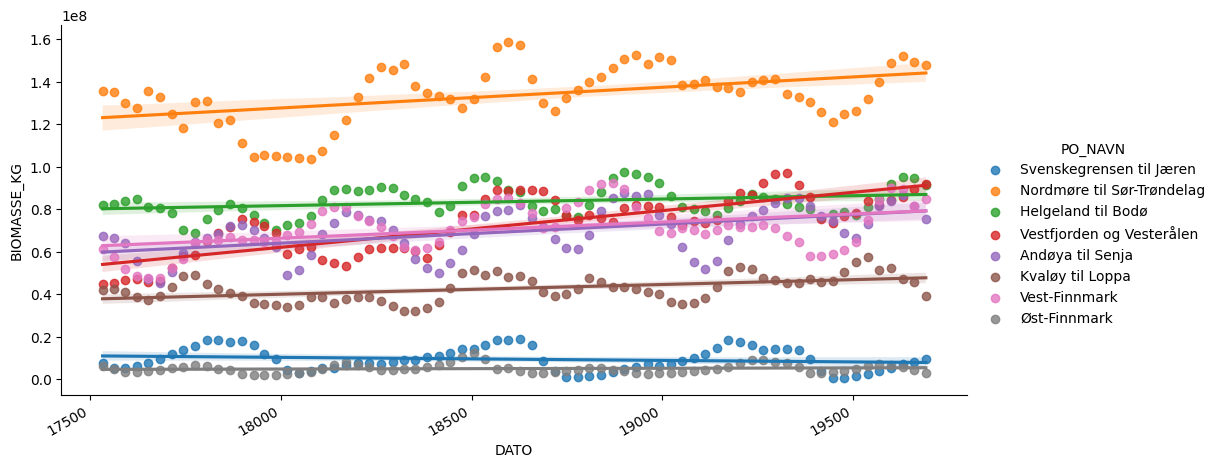

In [125]:
laks_green = monthly_laks(clean_df, "green")
laks_green['DATO'] = mdates.date2num(laks_green['DATO'])
laks = sns.lmplot(data=laks_green, x="DATO", y="BIOMASSE_KG", hue="PO_NAVN", aspect=2)
plt.gcf().autofmt_xdate()
plt.show()

## GULE OMRÅDER

/var/folders/_x/sb88pn2x5n155w8cdkqc519m0000gp/T/ipykernel_72154/2122027419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laks_df["DATO"] = pd.to_datetime(laks_df["DATO"])
/var/folders/_x/sb88pn2x5n155w8cdkqc519m0000gp/T/ipykernel_72154/2305087379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laks_yellow['DATO'] = mdates.date2num(laks_yellow['DATO'])


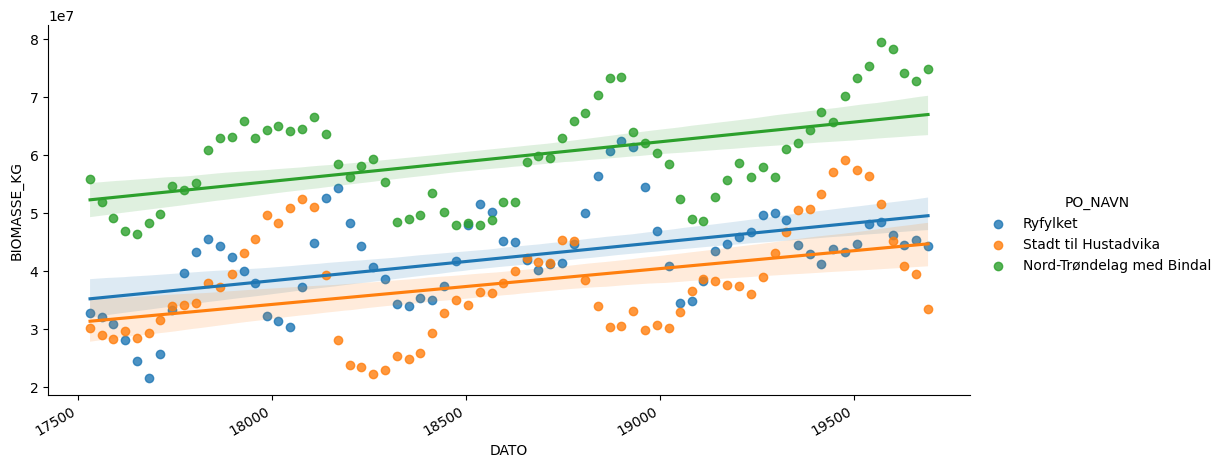

In [126]:
laks_yellow = monthly_laks(clean_df, "yellow")
laks_yellow['DATO'] = mdates.date2num(laks_yellow['DATO'])
laks = sns.lmplot(data=laks_yellow, x="DATO", y="BIOMASSE_KG", hue="PO_NAVN", aspect=2)
plt.gcf().autofmt_xdate()
plt.show()

## RØDE OMRÅDER

/var/folders/_x/sb88pn2x5n155w8cdkqc519m0000gp/T/ipykernel_72154/2122027419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laks_df["DATO"] = pd.to_datetime(laks_df["DATO"])
/var/folders/_x/sb88pn2x5n155w8cdkqc519m0000gp/T/ipykernel_72154/3927933353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laks_red['DATO'] = mdates.date2num(laks_red['DATO'])


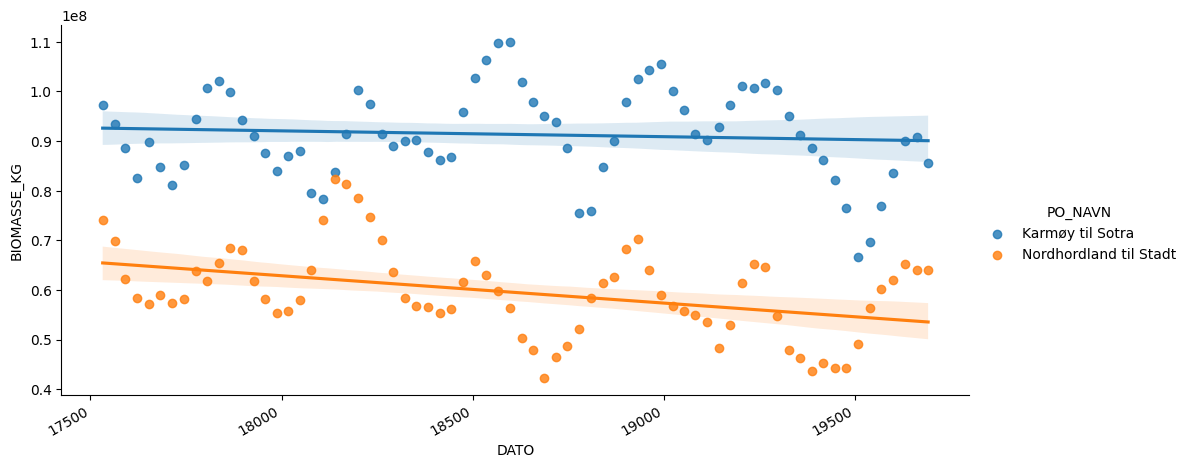

In [127]:
laks_red = monthly_laks(clean_df, "red")
laks_red['DATO'] = mdates.date2num(laks_red['DATO'])
laks = sns.lmplot(data=laks_red, x="DATO", y="BIOMASSE_KG", hue="PO_NAVN", aspect=2)
plt.gcf().autofmt_xdate()
plt.show()

### Questions

* What to do with null values on PO_KODE?